<a href="https://colab.research.google.com/github/david125-cmd/python-data-science-challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



Primero importamos los datos que estan almacenados externamente en formato csv

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_1 = pd.read_csv(url)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)

tienda_2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [6]:
#Sumamos las venta por cada tienda , las nombrearemos segun el snake_case
ingresos_tienda_1 = tienda_1['Precio'].sum()
ingresos_tienda_2 = tienda_2['Precio'].sum()
ingresos_tienda_3 = tienda_3['Precio'].sum()
ingresos_tienda_4 = tienda_4['Precio'].sum()

In [7]:
#Imprimimos el total de ventas por tienda hasta el momento
print("Ingresos totales por tienda:")
print(f"Tienda 1: ${ingresos_tienda_1:,.2f}")
print(f"Tienda 2: ${ingresos_tienda_2:,.2f}")
print(f"Tienda 3: ${ingresos_tienda_3:,.2f}")
print(f"Tienda 4: ${ingresos_tienda_4:,.2f}")

Ingresos totales por tienda:
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


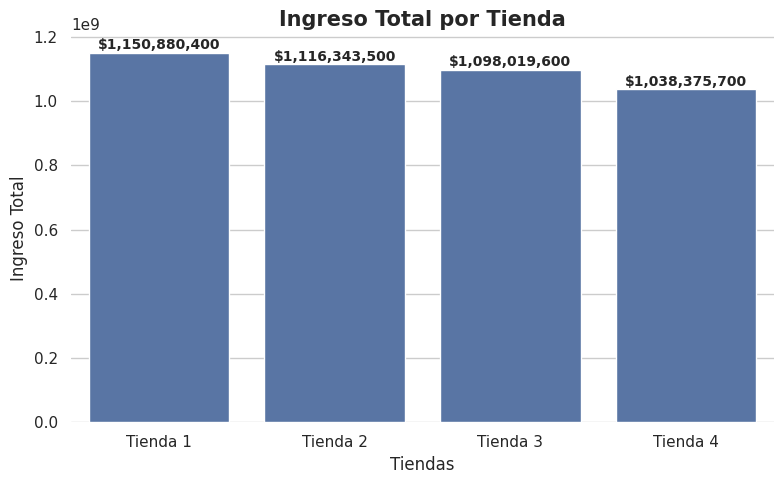

In [8]:
#Graficamos las ventas totales para una mejor visualización.

sns.set_theme(style="whitegrid")
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos_por_tienda = [ingresos_tienda_1, ingresos_tienda_2, ingresos_tienda_3, ingresos_tienda_4]

#tamaño de la grafica
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=tiendas, y=ingresos_por_tienda)

#etiquetas a cada barra
for i, valor in enumerate(ingresos_por_tienda):
    barplot.text(i, valor + max(ingresos_por_tienda)*0.001, f"${valor:,.0f}",
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Título y etiquetas
plt.title('Ingreso Total por Tienda', fontsize=15, fontweight='bold')
plt.ylabel('Ingreso Total', fontsize=12)
plt.xlabel('Tiendas', fontsize=12)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [9]:
#Revisamos las ventas por año de cada una de las tiendas para visualizar la evaluacion del desempeño de las tiendas


for df in [tienda_1, tienda_2, tienda_3, tienda_4]:
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce', format="%d/%m/%Y")
    df['Año'] = df['Fecha de Compra'].dt.year

ventas_por_anio = {
    'Tienda 1': tienda_1.groupby('Año')['Precio'].sum(),
    'Tienda 2': tienda_2.groupby('Año')['Precio'].sum(),
    'Tienda 3': tienda_3.groupby('Año')['Precio'].sum(),
    'Tienda 4': tienda_4.groupby('Año')['Precio'].sum()
}

df_ventas_anuales = pd.DataFrame(ventas_por_anio)

print("Ventas totales por tienda y año:\n")
print(df_ventas_anuales)

print("\nTienda que más vendió por año:\n")
print(df_ventas_anuales.idxmax(axis=1))

print("\nTienda que menos vendió por año:\n")
print(df_ventas_anuales.idxmin(axis=1))

Ventas totales por tienda y año:

         Tienda 1     Tienda 2     Tienda 3     Tienda 4
Año                                                     
2020  368933200.0  320466600.0  321707500.0  330847700.0
2021  362120800.0  351215500.0  362954400.0  347823600.0
2022  316565600.0  358226500.0  350438300.0  302221500.0
2023  103260800.0   86434900.0   62919400.0   57482900.0

Tienda que más vendió por año:

Año
2020    Tienda 1
2021    Tienda 3
2022    Tienda 2
2023    Tienda 1
dtype: object

Tienda que menos vendió por año:

Año
2020    Tienda 2
2021    Tienda 4
2022    Tienda 4
2023    Tienda 4
dtype: object


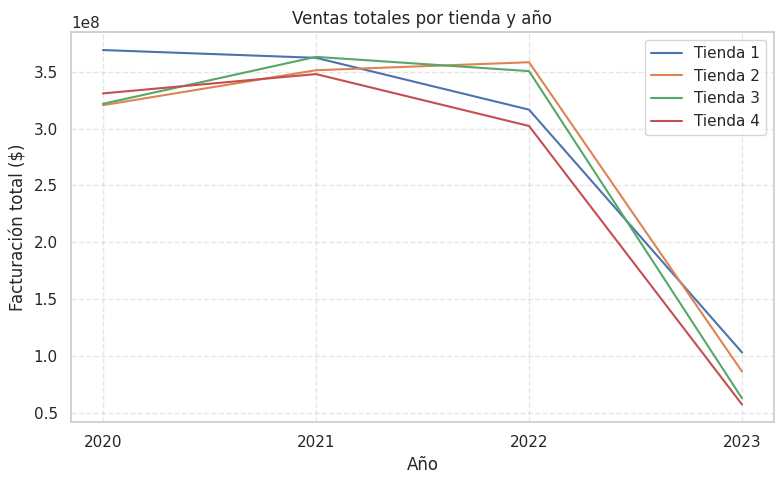

In [10]:
plt.figure(figsize=(8,5))

for tienda in df_ventas_anuales.columns:
    plt.plot(df_ventas_anuales.index, df_ventas_anuales[tienda], label=tienda)

plt.title("Ventas totales por tienda y año")
plt.xlabel("Año")
plt.ylabel("Facturación total ($)")
plt.xticks(df_ventas_anuales.index.astype(int))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [11]:
tienda_1['Tienda'] = 'Tienda 1'
tienda_2['Tienda'] = 'Tienda 2'
tienda_3['Tienda'] = 'Tienda 3'
tienda_4['Tienda'] = 'Tienda 4'

In [12]:
df_union = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index=True)

In [13]:
# Verificamos las venta por cada metodo de pago
metodos_pago = df_union.groupby(['Tienda', 'Método de pago']).size().reset_index(name='Cantidad')

totales_tienda = df_union['Tienda'].value_counts().reset_index()
totales_tienda.columns = ['Tienda', 'Total Ventas']

metodos_pago = metodos_pago.merge(totales_tienda, on='Tienda')
metodos_pago['Porcentaje'] = (metodos_pago['Cantidad'] / metodos_pago['Total Ventas']) * 100

metodos_pago['Porcentaje'] = metodos_pago['Porcentaje'].round(2)


print("Distribución de métodos de pago por tienda:\n")
print(metodos_pago)

Distribución de métodos de pago por tienda:

      Tienda      Método de pago  Cantidad  Total Ventas  Porcentaje
0   Tienda 1               Cupón       137          2359        5.81
1   Tienda 1               Nequi       483          2359       20.47
2   Tienda 1  Tarjeta de crédito      1704          2359       72.23
3   Tienda 1   Tarjeta de débito        35          2359        1.48
4   Tienda 2               Cupón       141          2359        5.98
5   Tienda 2               Nequi       467          2359       19.80
6   Tienda 2  Tarjeta de crédito      1721          2359       72.95
7   Tienda 2   Tarjeta de débito        30          2359        1.27
8   Tienda 3               Cupón       101          2359        4.28
9   Tienda 3               Nequi       468          2359       19.84
10  Tienda 3  Tarjeta de crédito      1753          2359       74.31
11  Tienda 3   Tarjeta de débito        37          2359        1.57
12  Tienda 4               Cupón       125          2358  

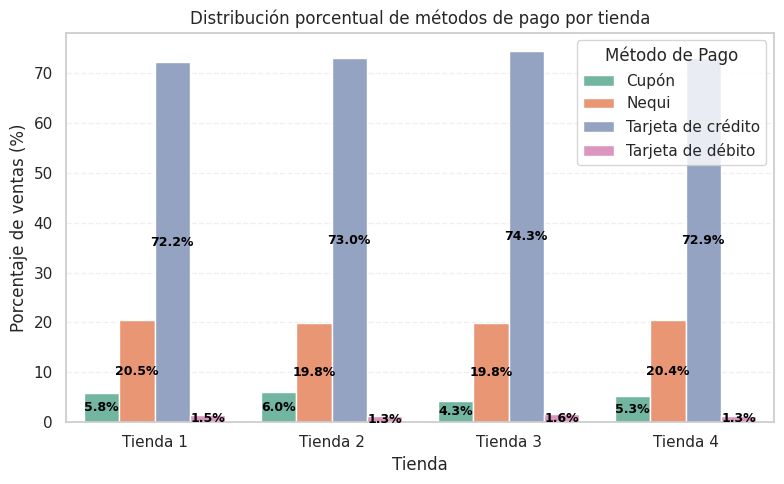

In [14]:
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    data=metodos_pago,
    x='Tienda',
    y='Porcentaje',
    hue='Método de pago',
    palette='Set2'
)


plt.title('Distribución porcentual de métodos de pago por tienda')
plt.ylabel('Porcentaje de ventas (%)')
plt.xlabel('Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Método de Pago')

for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        barplot.annotate(
            f'{height:.1f}%',
            (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
            ha='center',
            va='center',
            fontsize=9,
            color='black',
            weight='bold'
        )

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

Analizaremos las ventas segun su categoria que es un encabezado de las tablas csv que nos brindaron

In [18]:
#Creamos una funcion para analizar las ventas por categoria


sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-pastel")
palette = sns.color_palette("husl", 8)

def ventas_categorias(df_ventas_categoria, numero_tienda):
    # Contamos las ventas por categoría
    ventas_por_categoria = df_ventas_categoria['Categoría del Producto'].value_counts().reset_index()
    ventas_por_categoria.columns = ['Categoría', 'Ventas']

    print(f"\n{numero_tienda} - Distribución de categorías:")
    print(ventas_por_categoria.head(10))

    # Creamos la grafica para visualizar mejor las ventas por categoria

    plt.figure(figsize=(8, 5))
    plt.pie(ventas_por_categoria['Ventas'].head(8),
            labels=ventas_por_categoria['Categoría'].head(8),
            autopct='%1.1f%%',
            startangle=90,
            colors=palette,
            explode=(0.2, 0, 0, 0, 0, 0, 0, 0), #resaltamos en la grafica la categoria mas vendida
            wedgeprops={'width':0.4, 'edgecolor':'w', 'linewidth':2},
            pctdistance=0.85)

    plt.title(f'Distribución de Ventas por Categoría\n{numero_tienda}', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

    return ventas_por_categoria

=== VENTAS DE CATEGORÍAS POR TIENDA ===

Tienda 1 - Distribución de categorías:
                 Categoría  Ventas
0                  Muebles     465
1             Electrónicos     448
2                 Juguetes     324
3        Electrodomésticos     312
4     Deportes y diversión     284
5   Instrumentos musicales     182
6                   Libros     173
7  Artículos para el hogar     171


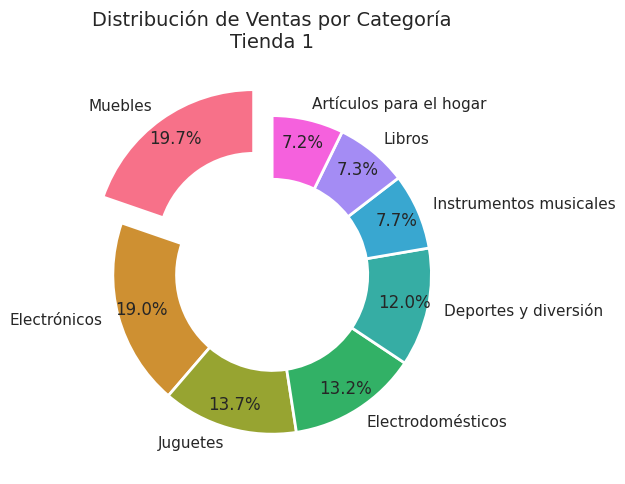


Tienda 2 - Distribución de categorías:
                 Categoría  Ventas
0                  Muebles     442
1             Electrónicos     422
2                 Juguetes     313
3        Electrodomésticos     305
4     Deportes y diversión     275
5   Instrumentos musicales     224
6                   Libros     197
7  Artículos para el hogar     181


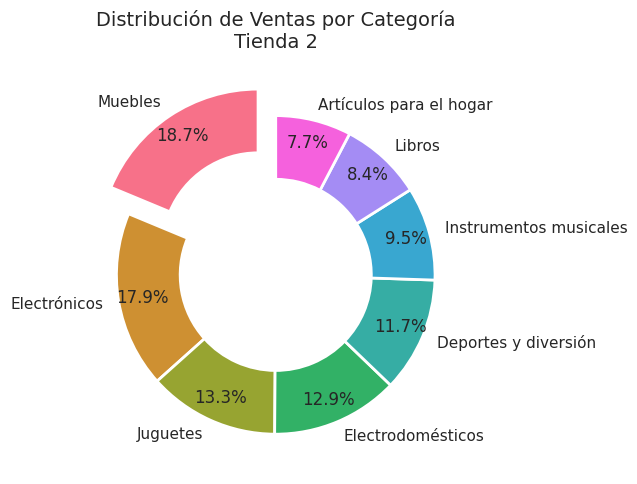


Tienda 3 - Distribución de categorías:
                 Categoría  Ventas
0                  Muebles     499
1             Electrónicos     451
2                 Juguetes     315
3        Electrodomésticos     278
4     Deportes y diversión     277
5                   Libros     185
6   Instrumentos musicales     177
7  Artículos para el hogar     177


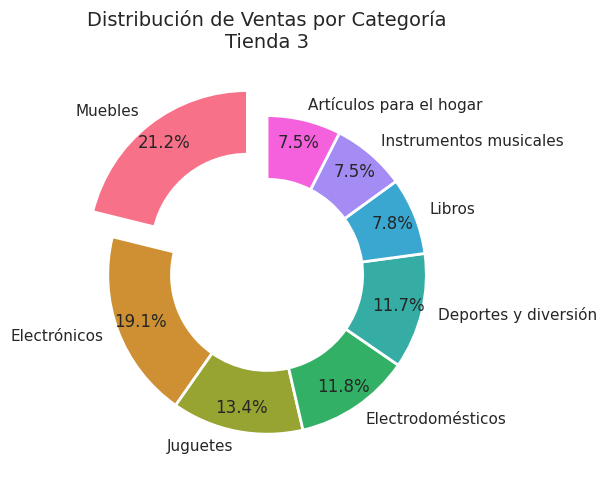


Tienda 4 - Distribución de categorías:
                 Categoría  Ventas
0                  Muebles     480
1             Electrónicos     451
2                 Juguetes     338
3     Deportes y diversión     277
4        Electrodomésticos     254
5  Artículos para el hogar     201
6                   Libros     187
7   Instrumentos musicales     170


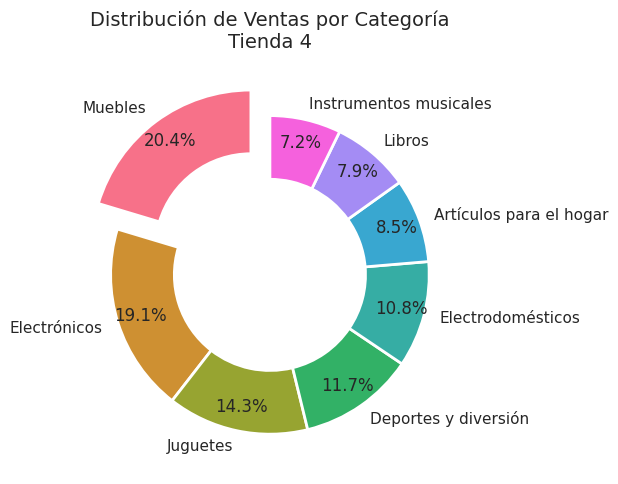

In [19]:
# Aplicamos la funcion para cada tienda
print("=== VENTAS DE CATEGORÍAS POR TIENDA ===")
categorias_tienda = ventas_categorias(tienda_1, "Tienda 1")
categorias_tienda2 = ventas_categorias(tienda_2, "Tienda 2")
categorias_tienda3 = ventas_categorias(tienda_3, "Tienda 3")
categorias_tienda4 = ventas_categorias(tienda_4, "Tienda 4")

vamos a simplificar el analisis para comparar entre tiendas

In [20]:
#Agregamos un resumen con el top de las categorias mas vendidas en cada tienda

top_categorias = pd.concat([
    categorias_tienda.assign(Tienda='Tienda 1').head(3),
    categorias_tienda2.assign(Tienda='Tienda 2').head(3),
    categorias_tienda3.assign(Tienda='Tienda 3').head(3),
    categorias_tienda4.assign(Tienda='Tienda 4').head(3)
])

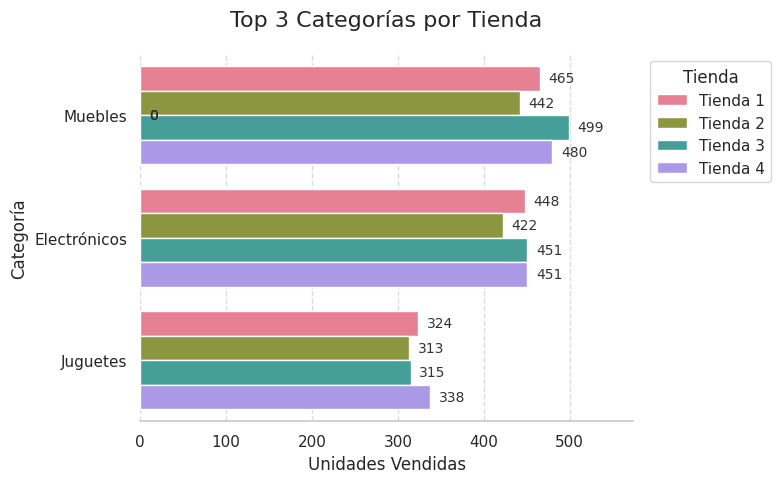

In [22]:
#Agregamos la grafica de barras para poder visualizar mejor el top de categorias mas vendidas
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=top_categorias, x='Ventas', y='Categoría', hue='Tienda',
                palette="husl", edgecolor='w', linewidth=1)


for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.02*max(top_categorias['Ventas']),
            p.get_y() + p.get_height()/2,  #
            f'{int(width):,}',
            ha='left', va='center',
            fontsize=10,
            color='#333')

plt.title('Top 3 Categorías por Tienda', fontsize=16, pad=20)
plt.xlabel('Unidades Vendidas', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.legend(title='Tienda', title_fontsize=12, bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xlim(0, max(top_categorias['Ventas']) * 1.15)
sns.despine(left=True)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


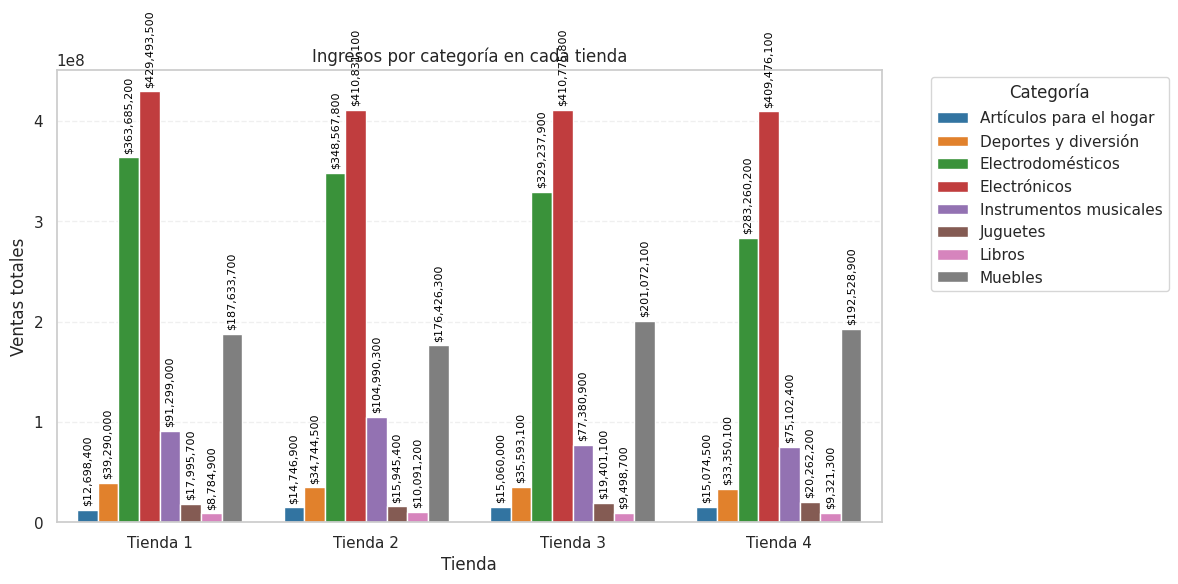

In [27]:

#Revisamos los ingresos obtenidos por categoria en cada tienda

ventas_categoria = df_union.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().reset_index()


plt.figure(figsize=(12, 6))


barplot = sns.barplot(
    data=ventas_categoria,
    x='Tienda',
    y='Precio',
    hue='Categoría del Producto',
    palette='tab10'
)


for container in barplot.containers:
    barplot.bar_label(container, fmt='${:,.0f}', label_type='edge', padding=3, fontsize=8, rotation = 90 ,color='black')


plt.title('Ingresos por categoría en cada tienda')
plt.ylabel('Ventas totales')
plt.xlabel('Tienda')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

Advertimos que en la categoria Electronicos la tienda 4 se queda muy por detras

In [31]:
tienda_1['Tienda'] = 'Tienda 1'
tienda_2['Tienda'] = 'Tienda 2'
tienda_3['Tienda'] = 'Tienda 3'
tienda_4['Tienda'] = 'Tienda 4'

df_union = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index=True)


precios_promedio = df_union.groupby(['Producto', 'Tienda'])['Precio'].mean().reset_index()


precios_t4 = precios_promedio[precios_promedio['Tienda'] == 'Tienda 4'].copy()
precios_otros = precios_promedio[precios_promedio['Tienda'] != 'Tienda 4'].copy()


promedios_otros = precios_otros.groupby('Producto')['Precio'].mean().reset_index()
promedios_otros.rename(columns={'Precio': 'Precio Promedio Otras Tiendas'}, inplace=True)


comparacion_t4 = precios_t4.merge(promedios_otros, on='Producto', how='left')


comparacion_t4['Diferencia ($)'] = comparacion_t4['Precio Promedio Otras Tiendas'] - comparacion_t4['Precio']
comparacion_t4['Diferencia (%)'] = (comparacion_t4['Diferencia ($)'] / comparacion_t4['Precio Promedio Otras Tiendas']) * 100


comparacion_t4 = comparacion_t4.sort_values('Diferencia ($)', ascending=False)

comparacion_formateada = comparacion_t4[['Producto', 'Precio', 'Precio Promedio Otras Tiendas', 'Diferencia ($)', 'Diferencia (%)']].copy()
comparacion_formateada.columns = ['Producto', 'Precio en Tienda 4', 'Precio Promedio Otras', 'Diferencia ($)', 'Diferencia (%)']


comparacion_formateada['Precio en Tienda 4'] = comparacion_formateada['Precio en Tienda 4'].apply(lambda x: f"${x:,.2f}")
comparacion_formateada['Precio Promedio Otras'] = comparacion_formateada['Precio Promedio Otras'].apply(lambda x: f"${x:,.2f}")
comparacion_formateada['Diferencia ($)'] = comparacion_formateada['Diferencia ($)'].apply(lambda x: f"${x:,.2f}")
comparacion_formateada['Diferencia (%)'] = comparacion_formateada['Diferencia (%)'].apply(lambda x: f"{x:.2f}%")


print("Comparación de precios: Tienda 4 vs otras tiendas\n")
print(comparacion_formateada.head(10))


Comparación de precios: Tienda 4 vs otras tiendas

             Producto Precio en Tienda 4 Precio Promedio Otras Diferencia ($)  \
48      TV LED UHD 4K      $2,257,382.50         $2,322,679.15     $65,296.65   
39       Refrigerador      $1,980,839.47         $2,022,340.59     $41,501.12   
33         Microondas        $533,175.00           $565,048.24     $31,873.24   
43   Silla de oficina        $363,135.00           $387,239.93     $24,104.93   
8           Bicicleta        $476,217.78           $497,516.18     $21,298.40   
31    Mesa de comedor        $242,192.73           $257,718.28     $15,525.55   
20             Estufa        $687,676.60           $702,799.53     $15,122.94   
25          Iphone 15      $2,014,531.25         $2,027,766.88     $13,235.63   
21  Guitarra acústica        $304,245.95           $314,965.89     $10,719.95   
7             Batería        $720,164.58           $728,166.58      $8,002.00   

   Diferencia (%)  
48          2.81%  
39          2.05%

Empezaremos a analizar la diferencia de los precios de las tiendas

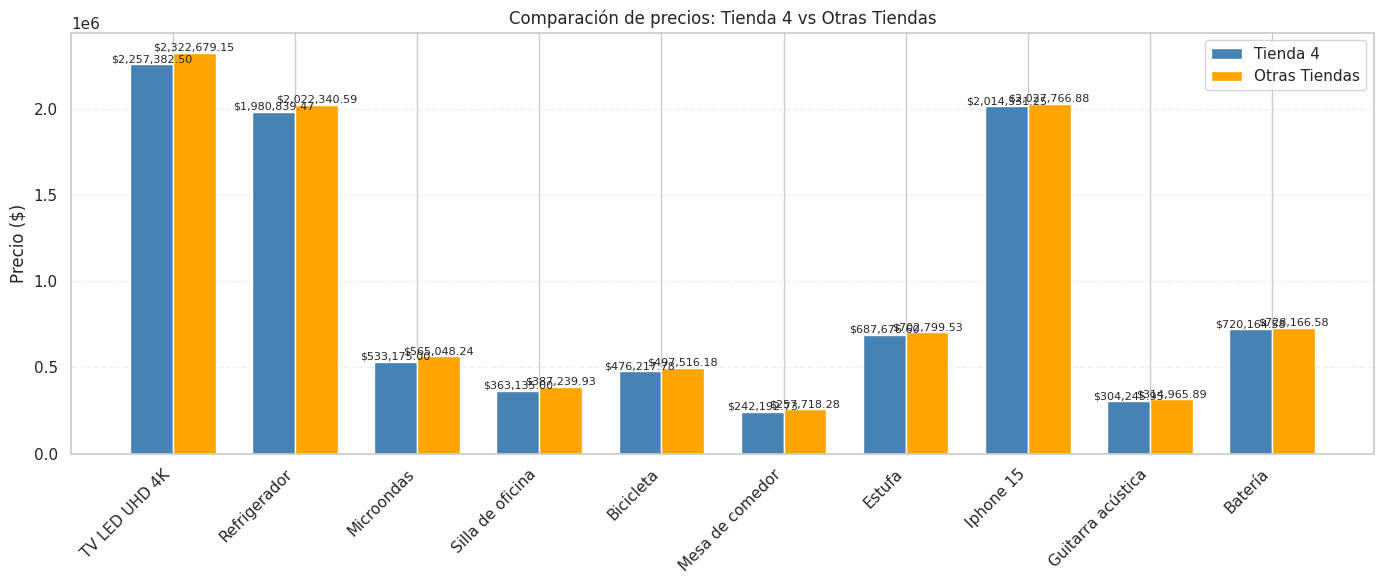

In [35]:
import numpy as np
#Realizamos una grafica para visualizar mejor la diferencia de precios
comparacion_t4['Producto'] = comparacion_t4['Producto'].astype(str)
comparacion_t4['Precio Tienda 4'] = comparacion_t4['Precio']
comparacion_t4['Precio Promedio Otras'] = comparacion_t4['Precio Promedio Otras Tiendas']

top10 = comparacion_t4.sort_values('Diferencia ($)', ascending=False).head(10)


productos = top10['Producto']
x = np.arange(len(productos))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))
b1 = ax.bar(x - width/2, top10['Precio Tienda 4'], width, label='Tienda 4', color='steelblue')
b2 = ax.bar(x + width/2, top10['Precio Promedio Otras'], width, label='Otras Tiendas', color='orange')

for bar in b1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f"${height:,.2f}", ha='center', va='bottom', fontsize=8)

for bar in b2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f"${height:,.2f}", ha='center', va='bottom', fontsize=8)


ax.set_ylabel('Precio ($)')
ax.set_title('Comparación de precios: Tienda 4 vs Otras Tiendas')
ax.set_xticks(x)
ax.set_xticklabels(productos, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

No es significativa la diferencia de precios de la tienda 4 y no influyen en su mal desempeño

# 3. Calificación promedio de la tienda


In [37]:
# Se calcula el promedio de las calificacioness de cada tienda
promedios = {
    'Tienda 1': tienda_1['Calificación'].mean(),
    'Tienda 2': tienda_2['Calificación'].mean(),
    'Tienda 3': tienda_3['Calificación'].mean(),
    'Tienda 4': tienda_4['Calificación'].mean()
}

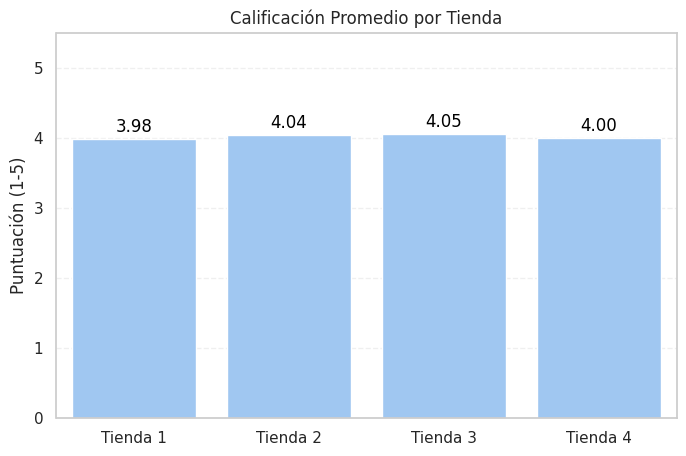


Resumen de Calificaciones:
          Calificación Promedio
Tienda 1               3.976685
Tienda 2               4.037304
Tienda 3               4.048326
Tienda 4               3.995759


In [39]:
#Creamos la grafica para poder visualizar mejor los promedios por tienda
plt.figure(figsize=(8, 5))
sns.barplot(x=list(promedios.keys()),
            y=list(promedios.values()),
            )

for i, valor in enumerate(promedios.values()):
    plt.text(i, valor + 0.1, f'{valor:.2f}',
             ha='center',
             color='black')

plt.title('Calificación Promedio por Tienda')
plt.ylabel('Puntuación (1-5)')
plt.ylim(0, 5.5)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

# Mostramos un pequeño resumen de las calificaciones
print("\nResumen de Calificaciones:")
print(pd.DataFrame.from_dict(promedios,
                           orient='index',
                           columns=['Calificación Promedio']))

La diferencia no es determinante

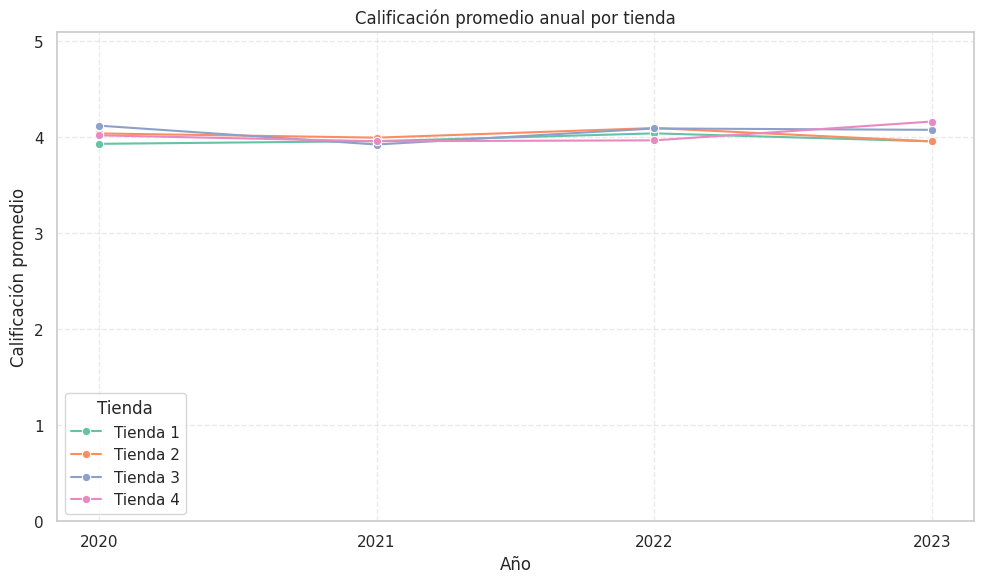

In [43]:
#Verificamos como han sido las calificaciones recibidas por año

tienda_1['Año'] = tienda_1['Fecha de Compra'].dt.year
tienda_1['Tienda'] = 'Tienda 1'
tienda_2['Año'] = tienda_2['Fecha de Compra'].dt.year
tienda_2['Tienda'] = 'Tienda 2'
tienda_3['Año'] = tienda_3['Fecha de Compra'].dt.year
tienda_3['Tienda'] = 'Tienda 3'
tienda_4['Año'] = tienda_4['Fecha de Compra'].dt.year
tienda_4['Tienda'] = 'Tienda 4'

df_union = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index=True)

calificaciones_anuales = df_union.groupby(['Año', 'Tienda'])['Calificación'].mean().reset_index()
calificaciones_anuales = calificaciones_anuales.sort_values(['Tienda', 'Año'])


plt.figure(figsize=(10, 6))
sns.lineplot(data=calificaciones_anuales, x='Año', y='Calificación', hue='Tienda', marker='o', palette='Set2')

plt.title('Calificación promedio anual por tienda')
plt.ylabel('Calificación promedio')
plt.xticks(df_ventas_anuales.index.astype(int))
plt.ylim(0, 5.1)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Son muy similares en su evolucion y no hay un impacto

In [44]:
#Verificamos si existen productos que reciban bajas calificaciones
tienda_1['Tienda'] = 'Tienda 1'
tienda_2['Tienda'] = 'Tienda 2'
tienda_3['Tienda'] = 'Tienda 3'
tienda_4['Tienda'] = 'Tienda 4'

df_union = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index=True)
calificaciones_por_producto = df_union.groupby(['Tienda', 'Producto'])['Calificación'].agg(['mean', 'count']).reset_index()
calificaciones_por_producto.rename(columns={'mean': 'Calificación Promedio', 'count': 'Cantidad de Calificaciones'}, inplace=True)


calificaciones_filtradas = calificaciones_por_producto[calificaciones_por_producto['Cantidad de Calificaciones'] >= 5]
peores_por_tienda = calificaciones_filtradas.sort_values(['Tienda', 'Calificación Promedio']).groupby('Tienda').head(5)

print("Productos con peor calificación promedio por tienda:\n")
print(peores_por_tienda)

Productos con peor calificación promedio por tienda:

       Tienda             Producto  Calificación Promedio  \
42   Tienda 1         Set de vasos               3.292683   
41   Tienda 1         Set de ollas               3.581395   
17   Tienda 1   Cuerda para saltar               3.625000   
3    Tienda 1          Auriculares               3.640000   
35   Tienda 1  Modelado predictivo               3.647059   
66   Tienda 2           Cubertería               3.615385   
67   Tienda 2      Cubo mágico 8x8               3.622222   
101  Tienda 2         Vaso térmico               3.659574   
87   Tienda 2          Muñeca bebé               3.708333   
79   Tienda 2     Lavadora de ropa               3.734694   
135  Tienda 3           Microondas               3.500000   
151  Tienda 3          Tablet ABXY               3.666667   
132  Tienda 3       Mesa de centro               3.690476   
104  Tienda 3    Asistente virtual               3.692308   
108  Tienda 3    Balón de volei

Los productos no son fuente de descontento

evaluaremos la atencion al cliente

In [47]:
tienda_1['Tienda'] = 'Tienda 1'
tienda_2['Tienda'] = 'Tienda 2'
tienda_3['Tienda'] = 'Tienda 3'
tienda_4['Tienda'] = 'Tienda 4'

df_union = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index=True)

# Calculamos el promedio de las calificaciones recibidas por cada empleado
calif_empleados = df_union.groupby(['Tienda', 'Vendedor'])['Calificación'].agg(['mean', 'count']).reset_index()
calif_empleados.columns = ['Tienda', 'Vendedor', 'Calificación Promedio', 'Cantidad de Ventas']


calif_empleados = calif_empleados.sort_values(['Tienda', 'Calificación Promedio'])

# Verificamos la calificaciones mas bajas recibidas
peores = calif_empleados.groupby('Tienda').head(3)

print("Empleados con calificaciones más bajas por tienda:\n")
print(peores)

Empleados con calificaciones más bajas por tienda:

      Tienda         Vendedor  Calificación Promedio  Cantidad de Ventas
4   Tienda 1  Izabela de León               3.751269                 197
5   Tienda 1   Juan Fernandez               3.852761                 163
8   Tienda 1    Maria Alfonso               3.884393                 173
15  Tienda 2   Blanca Ramirez               3.933735                 166
26  Tienda 2   Santiago Silva               3.937888                 161
20  Tienda 2    Juliana Costa               3.938547                 179
32  Tienda 3  Izabela de León               3.730994                 171
34  Tienda 3    Juliana Costa               3.806061                 165
36  Tienda 3    Maria Alfonso               3.951613                 186
52  Tienda 4      Pedro Gomez               3.857143                 154
50  Tienda 4    Maria Alfonso               3.906667                 150
44  Tienda 4    Camila Rivera               3.915663                 166

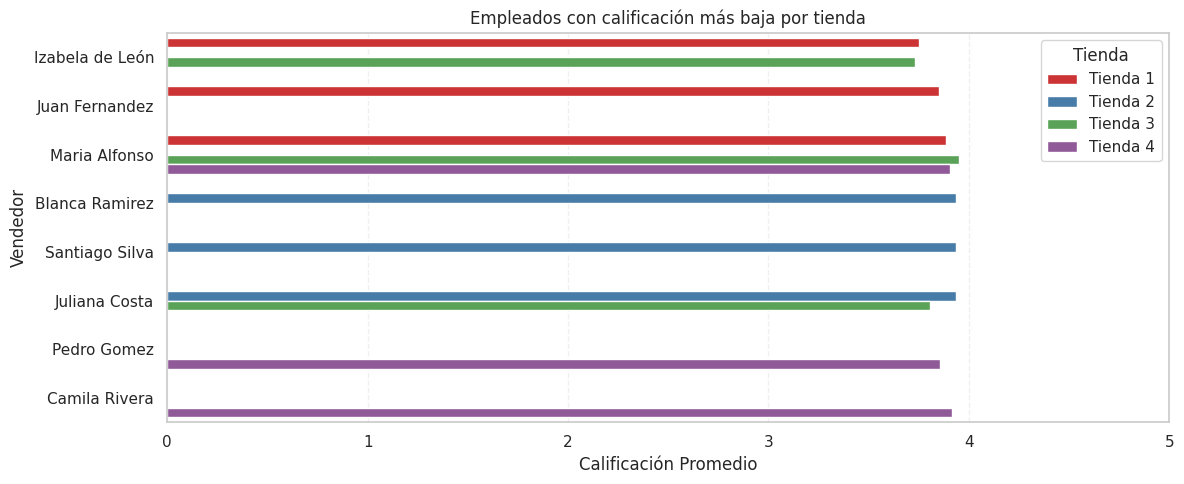

In [49]:
plt.figure(figsize=(12, 5))
sns.barplot(
    data=peores,
    x='Calificación Promedio',
    y='Vendedor',
    hue='Tienda',
    dodge=True,
    palette='Set1'
)

plt.title('Empleados con calificación más baja por tienda')
plt.xlabel('Calificación Promedio')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


No hay un impacto de la calificacion del trabajador en la diferencia de ventas

# 4. Productos más y menos vendidos

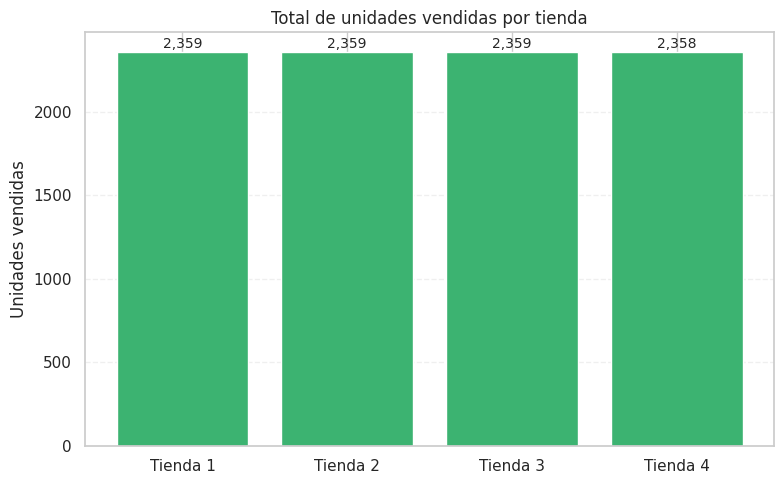

In [51]:
#Visualizamos primeramente el total de unidades vendidas en cada tienda
ventas_unidades = {
    'Tienda 1': len(tienda_1),
    'Tienda 2': len(tienda_2),
    'Tienda 3': len(tienda_3),
    'Tienda 4': len(tienda_4)
}

tiendas = list(ventas_unidades.keys())
unidades = list(ventas_unidades.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiendas, unidades, color='mediumseagreen')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{int(yval):,}', ha='center', va='bottom', fontsize=10)

plt.title('Total de unidades vendidas por tienda')
plt.ylabel('Unidades vendidas')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Tienda 1 - Productos más vendidos:

Producto
Microondas                 60
TV LED UHD 4K              60
Armario                    60
Secadora de ropa           58
Mesa de noche              56
Bloques de construcción    56
Balón de baloncesto        55
Bicicleta                  54
Vaso térmico               54
Refrigerador               54

Tienda 1 - Productos menos vendidos:

Producto
Muñeca bebé                    40
Mesa de comedor                40
Dinosaurio Rex                 40
Cuerda para saltar             40
Mochila                        39
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33


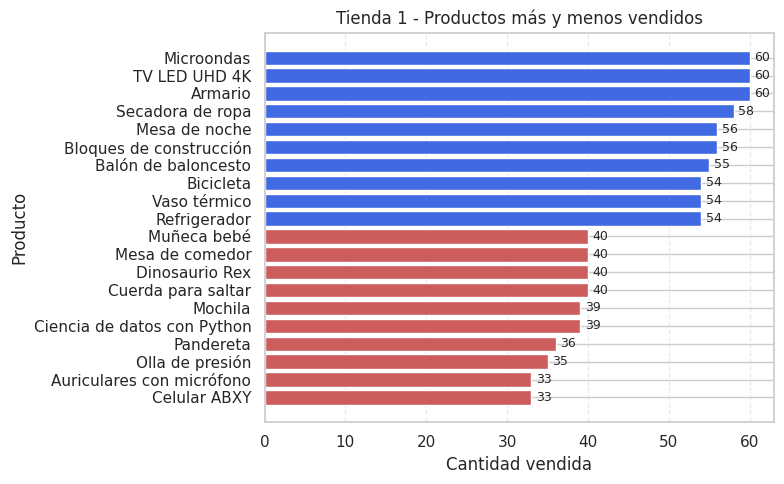


Tienda 2 - Productos más vendidos:

Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Secadora de ropa             57
Iphone 15                    55
Bloques de construcción      54
Armario                      54
Set de ollas                 52

Tienda 2 - Productos menos vendidos:

Producto
Dinosaurio Rex       42
Celular ABXY         41
Smart TV             40
Cubertería           39
Asistente virtual    38
Auriculares          37
Sillón               35
Mesa de comedor      34
Impresora            34
Juego de mesa        32


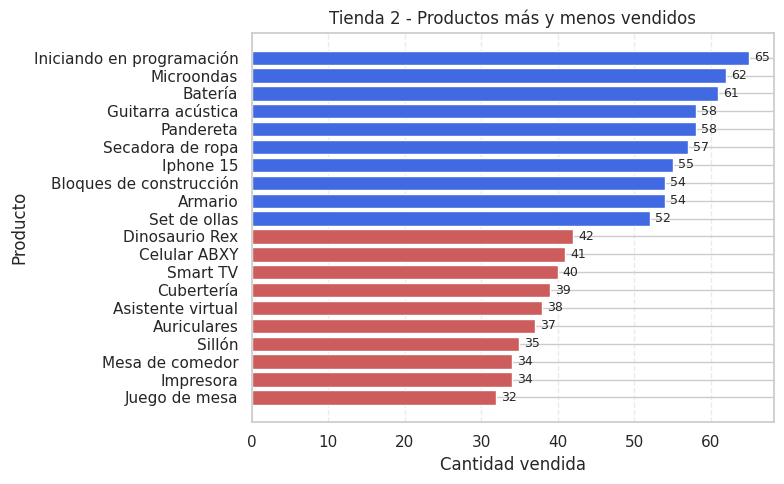


Tienda 3 - Productos más vendidos:

Producto
Kit de bancas                57
Mesa de comedor              56
Cama king                    56
Set de ollas                 55
Mesa de noche                55
Smart TV                     54
Estufa                       53
Cuerda para saltar           53
Modelado predictivo          53
Carrito de control remoto    52

Tienda 3 - Productos menos vendidos:

Producto
Cubertería                   39
Muñeca bebé                  39
Auriculares con micrófono    39
Asistente virtual            39
Vaso térmico                 38
Guitarra eléctrica           38
Set de vasos                 36
Mochila                      36
Microondas                   36
Bloques de construcción      35


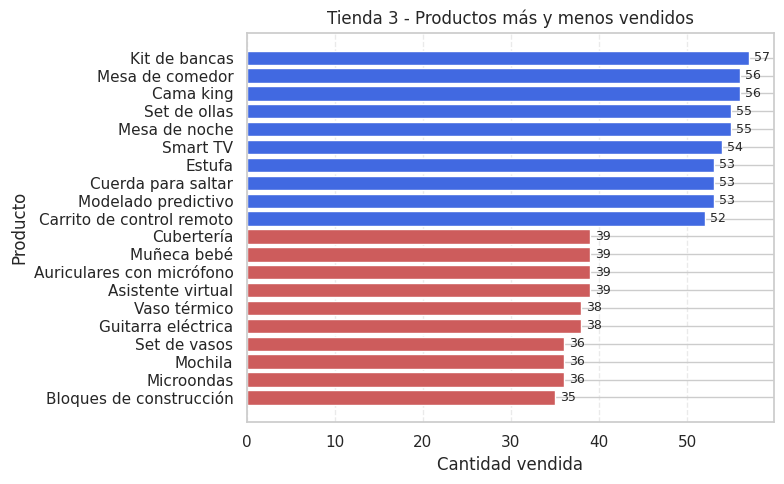


Tienda 4 - Productos más vendidos:

Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Mesa de comedor              55
Mesa de noche                55
Smart TV                     54
Bloques de construcción      54
Pandereta                    52

Tienda 4 - Productos menos vendidos:

Producto
Silla de oficina               40
Celular ABXY                   39
Ajedrez de madera              39
Smartwatch                     39
Lavadora de ropa               38
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33


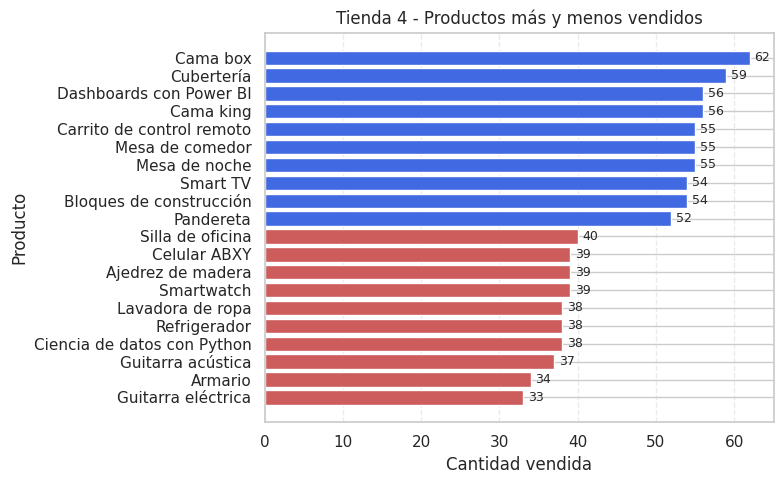

In [54]:
#Ahora desglosamos las unidades vendidas en cada tienda para ver cuáles fueron las productos más vendidos
tiendas = {
    'Tienda 1': tienda_1,
    'Tienda 2': tienda_2,
    'Tienda 3': tienda_3,
    'Tienda 4': tienda_4
}

#Creamos una funcion para poder contar los productos mas vendidos y los menos vendidos
#asi mismo poder graficarlos
def productos_menos_mas_vendidos(df_tiendas, numero_tienda):
    conteo = df_tiendas['Producto'].value_counts()
    mas_vendidos = conteo.head(10)
    menos_vendidos = conteo.tail(10)

    print(f"\n{numero_tienda} - Productos más vendidos:\n")
    print(mas_vendidos.to_string())
    print(f"\n{numero_tienda} - Productos menos vendidos:\n")
    print(menos_vendidos.to_string())

    productos = pd.concat([mas_vendidos, menos_vendidos])
    colores = ['royalblue'] * len(mas_vendidos) + ['indianred'] * len(menos_vendidos)


    plt.figure(figsize=(8, 5))
    bars = plt.barh(productos.index, productos.values, color=colores)

    for bar in bars:
        ancho = bar.get_width()
        plt.text(
            ancho + max(productos.values) * 0.01,
            bar.get_y() + bar.get_height() / 2,
            f'{int(ancho)}',
            va='center',
            ha='left',
            fontsize=9
        )

    plt.title(f"{numero_tienda} - Productos más y menos vendidos")
    plt.xlabel("Cantidad vendida")
    plt.ylabel("Producto")
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

# Ejecutamos la funcion para visualizar los resultados
for nombre, df in tiendas.items():
    productos_menos_mas_vendidos(df, nombre)

identificaemos la cantidad de articulos ofertados por cada tienda

In [55]:
# Validamos la cantidad de productos ofertadas en cada tienda
variedad_productos = {
    'Tienda 1': tienda_1['Producto'].nunique(),
    'Tienda 2': tienda_2['Producto'].nunique(),
    'Tienda 3': tienda_3['Producto'].nunique(),
    'Tienda 4': tienda_4['Producto'].nunique()
}

for tienda, cantidad in variedad_productos.items():
    print(f"{tienda}: {cantidad} productos únicos")

Tienda 1: 51 productos únicos
Tienda 2: 51 productos únicos
Tienda 3: 51 productos únicos
Tienda 4: 51 productos únicos


son iguales y no impacatan en las ventas

# 5. Envío promedio por tienda





In [57]:
# Cálculamos el costo de envío promedio por tienda
costo_envio_promedio = {
    'Tienda 1': tienda_1['Costo de envío'].mean(),
    'Tienda 2': tienda_2['Costo de envío'].mean(),
    'Tienda 3': tienda_3['Costo de envío'].mean(),
    'Tienda 4': tienda_4['Costo de envío'].mean()
}

print("Costo de envío promedio por tienda:\n")
for tienda, costo in costo_envio_promedio.items():
    print(f"{tienda}: ${costo:,.2f}")

Costo de envío promedio por tienda:

Tienda 1: $26,018.61
Tienda 2: $25,216.24
Tienda 3: $24,805.68
Tienda 4: $23,459.46


In [59]:
# Verificamos si existe una correlacion entre el costo de envio con la calificacion que reciben las tiendas

#promedio de costo de envio
envio_promedio = {
    'Tienda 1': tienda_1['Costo de envío'].mean(),
    'Tienda 2': tienda_2['Costo de envío'].mean(),
    'Tienda 3': tienda_3['Costo de envío'].mean(),
    'Tienda 4': tienda_4['Costo de envío'].mean()
}

# promedio de calificación por tienda
calificacion_promedio = {
    'Tienda 1': tienda_1['Calificación'].mean(),
    'Tienda 2': tienda_2['Calificación'].mean(),
    'Tienda 3': tienda_3['Calificación'].mean(),
    'Tienda 4': tienda_4['Calificación'].mean()
}


In [60]:
#Creamos un dataframe para ambos valores
comparacion = pd.DataFrame({
    'Costo de Envío Promedio': envio_promedio,
    'Calificación Promedio': calificacion_promedio
}).reset_index().rename(columns={'index': 'Tienda'})

print(comparacion)

     Tienda  Costo de Envío Promedio  Calificación Promedio
0  Tienda 1             26018.609580               3.976685
1  Tienda 2             25216.235693               4.037304
2  Tienda 3             24805.680373               4.048326
3  Tienda 4             23459.457167               3.995759


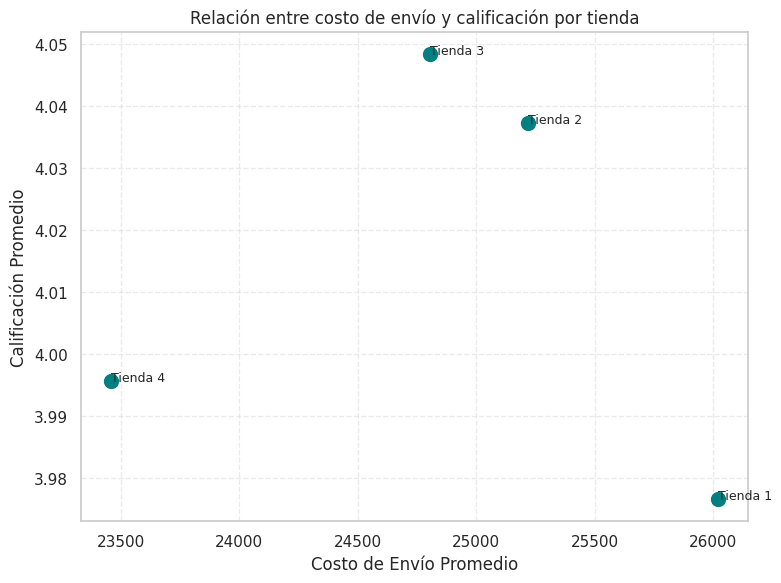

In [61]:
#Creamos una grafica de dispersion para poder visualizar mejor

plt.figure(figsize=(8,6))
plt.scatter(comparacion['Costo de Envío Promedio'], comparacion['Calificación Promedio'], color='teal', s=100)


for i, row in comparacion.iterrows():
    plt.text(row['Costo de Envío Promedio'] + 0.05, row['Calificación Promedio'], row['Tienda'], fontsize=9)

plt.title('Relación entre costo de envío y calificación por tienda')
plt.xlabel('Costo de Envío Promedio')
plt.ylabel('Calificación Promedio')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [62]:
#Verificamos si existe una correlacion entre los costos de envio y la calificacion

correlacion = comparacion['Costo de Envío Promedio'].corr(comparacion['Calificación Promedio'])
print(f"Correlación entre costo de envío y calificación: {correlacion:.2f}")

Correlación entre costo de envío y calificación: -0.10


El indice de correlacion nos indica que el costo de envio tampoco es un factor diferenciador

# 6. Conclusiones





En el analisis de las variables que nos sugirieon no encontramos la causa de la baja  venta de la tienda 4 con respecto a las otras tiendas . Pero si logramos determinar que la tienda 4 es la menos rentable entre las tiendas, por lo que es la candidata correcta a vender para el Señor Juan.


In [63]:
#Imprimimos el total de ventas por tienda hasta el momento
print("Ingresos totales por tienda:")
print(f"Tienda 1: ${ingresos_tienda_1:,.2f}")
print(f"Tienda 2: ${ingresos_tienda_2:,.2f}")
print(f"Tienda 3: ${ingresos_tienda_3:,.2f}")
print(f"Tienda 4: ${ingresos_tienda_4:,.2f}")

Ingresos totales por tienda:
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


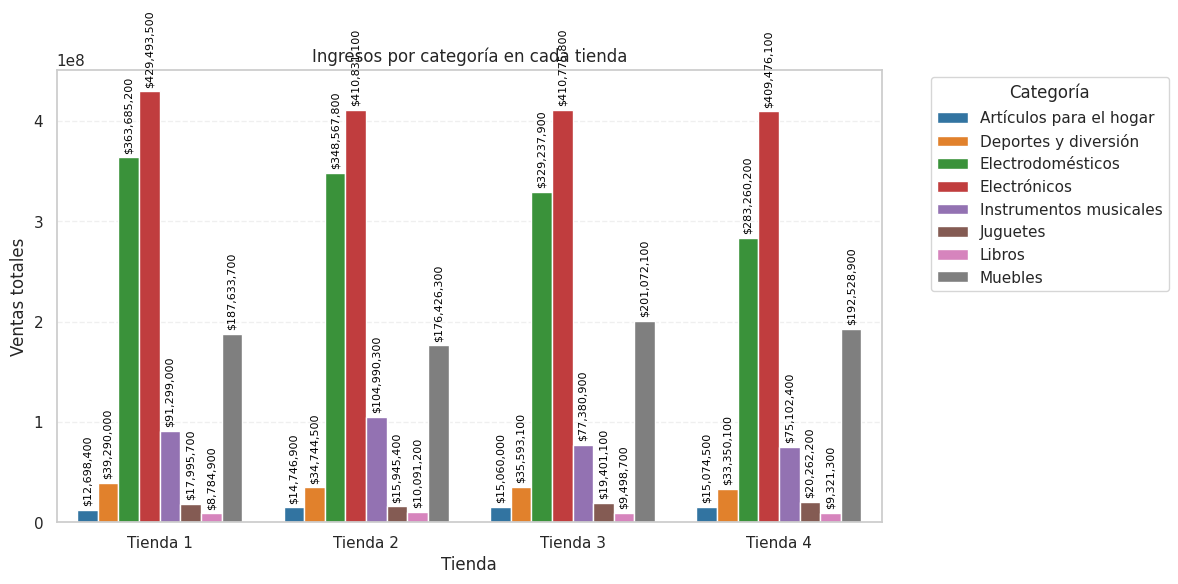

In [64]:

#Revisamos los ingresos obtenidos por categoria en cada tienda

ventas_categoria = df_union.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().reset_index()


plt.figure(figsize=(12, 6))


barplot = sns.barplot(
    data=ventas_categoria,
    x='Tienda',
    y='Precio',
    hue='Categoría del Producto',
    palette='tab10'
)


for container in barplot.containers:
    barplot.bar_label(container, fmt='${:,.0f}', label_type='edge', padding=3, fontsize=8, rotation = 90 ,color='black')


plt.title('Ingresos por categoría en cada tienda')
plt.ylabel('Ventas totales')
plt.xlabel('Tienda')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [65]:
#Creamos un dataframe para ambos valores
comparacion = pd.DataFrame({
    'Costo de Envío Promedio': envio_promedio,
    'Calificación Promedio': calificacion_promedio
}).reset_index().rename(columns={'index': 'Tienda'})

print(comparacion)

     Tienda  Costo de Envío Promedio  Calificación Promedio
0  Tienda 1             26018.609580               3.976685
1  Tienda 2             25216.235693               4.037304
2  Tienda 3             24805.680373               4.048326
3  Tienda 4             23459.457167               3.995759
